#### ***Lecture 08***  | Image Segmentation (Distance Transform)

In [208]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

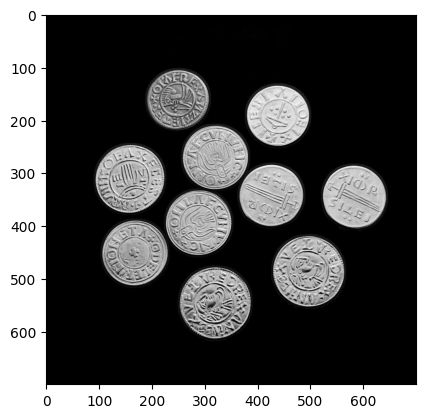

In [209]:
# Load Image
img = cv2.imread('coins.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap='gray')

In [210]:
# Pre process

# Thresholding
_, img_thr = cv2.threshold(img, 80, 255, cv2.THRESH_BINARY)

# Closing 
img_closed = cv2.morphologyEx(img_thr, cv2.MORPH_CLOSE,
                              np.ones((3,3), np.uint8),
                              iterations= 3)

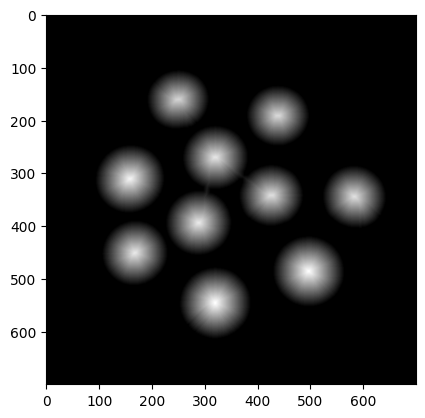

In [211]:
### --- Eucledean ---

# Apply distance transform
# | Image matrix
# | distance calculation method
# | marksize: 3 or 5
dist = cv2.distanceTransform(img_closed, cv2.DIST_L2, 3)
cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)

# Display
plt.imshow(dist, cmap='gray')

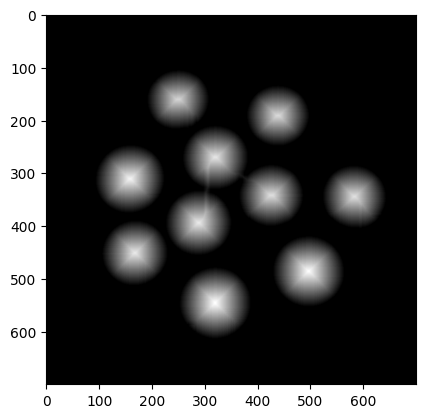

In [212]:
### --- City Block ---

dist = cv2.distanceTransform(img_closed, cv2.DIST_L1, 3)
cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)

# Display
plt.imshow(dist, cmap='gray')

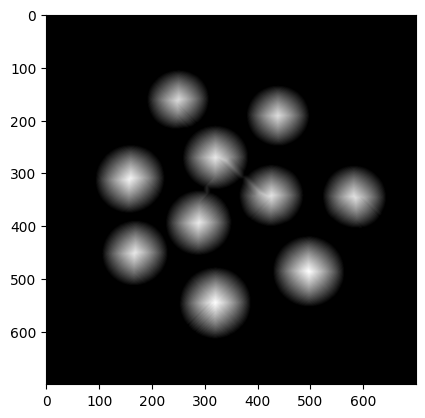

In [213]:
### --- Chess Board ---

dist = cv2.distanceTransform(img_closed, cv2.DIST_C, 3)
cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)

# Display
plt.imshow(dist, cmap='gray')

#### ***Lecture 08***  | Image Segmentation (Image Contour)

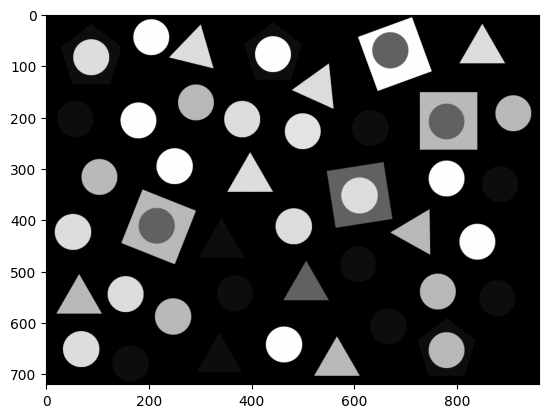

In [214]:
# Load image
img = cv2.imread('gray.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)

plt.imshow(img, cmap= 'gray')

In [215]:
### --- Find Contour ---

# findContours(img, hierarchy, method)
# | img: image matrix
# | hierachy: how the bounding is structured (LIST, EXTERNAL, CCOMP, TREE)
# | method: calculation (CHAIN_APPROX_NONE, CHAIN_APPROX_SIMPLE)
contours, _ = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# a list of contours will be returned from the function
print(contours)


(array([[[157, 645]],

       [[156, 646]],

       [[154, 646]],

       [[153, 647]],

       [[150, 647]],

       [[149, 648]],

       [[148, 648]],

       [[146, 650]],

       [[145, 650]],

       [[143, 652]],

       [[142, 652]],

       [[135, 659]],

       [[135, 660]],

       [[134, 661]],

       [[134, 662]],

       [[132, 664]],

       [[132, 665]],

       [[131, 666]],

       [[131, 668]],

       [[130, 669]],

       [[130, 672]],

       [[129, 673]],

       [[129, 687]],

       [[130, 688]],

       [[130, 690]],

       [[131, 691]],

       [[131, 693]],

       [[132, 694]],

       [[132, 695]],

       [[133, 696]],

       [[133, 697]],

       [[135, 699]],

       [[135, 700]],

       [[138, 703]],

       [[138, 704]],

       [[139, 705]],

       [[140, 705]],

       [[144, 709]],

       [[145, 709]],

       [[146, 710]],

       [[147, 710]],

       [[148, 711]],

       [[149, 711]],

       [[150, 712]],

       [[152, 712]],

       [[

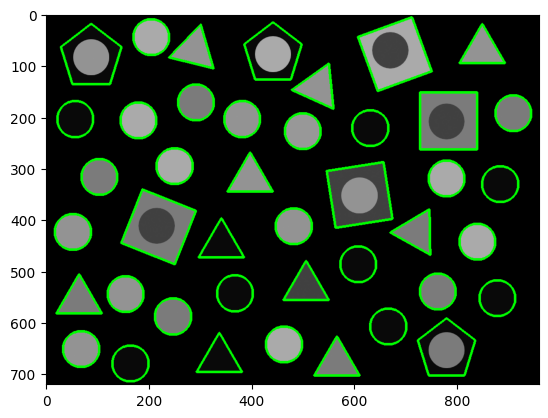

In [216]:
### --- Draw Contour ---
# Cloned image for drawing
img_contour = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Draw the received contour - drawContour()
# | image matrix you want to draw on
# | contour array
# | contour index: -1 for all
# | olor
# | thickness
cv2.drawContours(img_contour, contours, -1, (0, 255, 0), 3)

plt.imshow(img_contour)


Area: 12564.5
ArcLength: 484.5168067216873


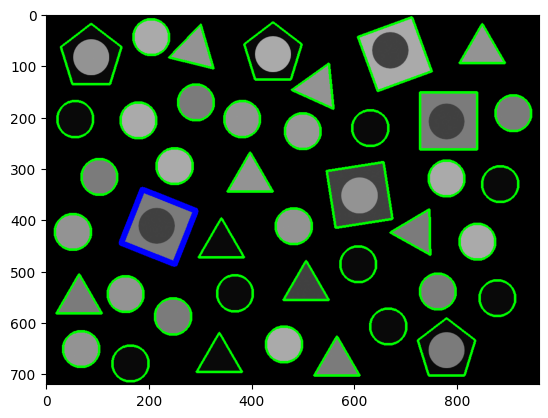

In [217]:
### --- Contour parameter ---
cv2.drawContours(img_contour, contours, 20, (0, 0, 255), 10)

# Contour area
Area = cv2.contourArea(contours[20])

# Contour size
# | a contour
# | whether the contour is a close loop
ArcLength = cv2.arcLength(contours[20], True)

# Display
print('Area:', Area)
print('ArcLength:', ArcLength)
plt.imshow(img_contour)

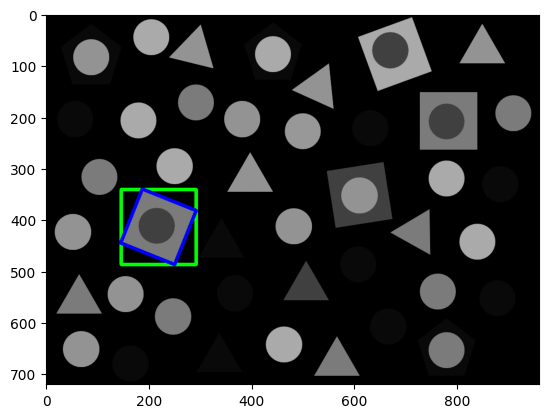

In [218]:
### --- Bounding rectangle ---
img_contour = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Get straight rectangle - boundingRect(contour)
# | return x, y, width, height
x, y, w, h = cv2.boundingRect(contours[20])

# Draw rectangle
# | image matrix
# | starting position
# | ending position
# | color
# | thickness
cv2.rectangle(img_contour, (x, y), (x+w, y+h), (0, 255, 0), 5)


# Get smallest rectangle - minAreaRect(contour)
# return corner points of the rectangle
rect = cv2.minAreaRect(contours[20])

# Convert to np int, drawing does not support floating points
box = cv2.boxPoints(rect)
box = np.int_(box)

# Draw rectangle
cv2.drawContours(img_contour, [box], 0, (0, 0, 255), 5)

# Display
plt.imshow(img_contour)

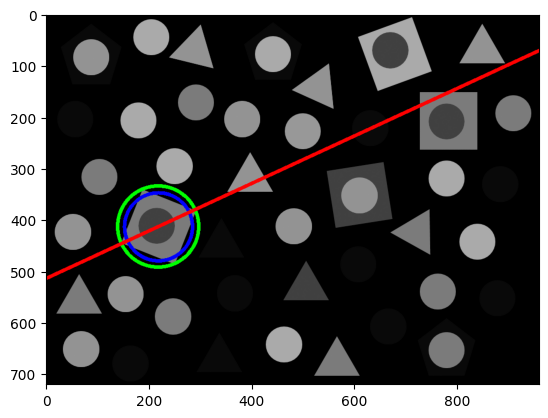

In [221]:
### --- Bounding Shapes ---
img_contour = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

## Circle
(x, y), radius = cv2.minEnclosingCircle(contours[20])
ct = (int(x), int(y))
radius = int(radius)
cv2.circle(img_contour, ct, radius, (0,255,0), 5)

## Ellipse
ellipse = cv2.fitEllipse(contours[20])
cv2.ellipse(img_contour, ellipse, (0,0,255), 5)

## Line
# Gets shape of image
rows, cols = img_contour.shape[:2]

# Get line parameter - fitLine()
# Return 4 parameter
# | vx: The x-component of the normalized vector (direction) collinear to the line.
# | vy: The y-component of the normalized vector (direction) collinear to the line.
# | x: The x-coordinate of a point on the line.
# | y: The y-coordinate of a point on the line.\
[vx, vy, x, y] = cv2.fitLine(contours[20], cv2.DIST_L2, 0, 0.01, 0.01)

# Create line parmeter
lefty= int(((-x*vy/vx) +y))
righty= int((((cols-x)*vy/vx)+y))

# Draw line
cv2.line(img_contour, (cols-1, righty), (0, lefty), (255, 0, 0), 5)

# Display
plt.imshow(img_contour)